In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## FIO Data (Toby's individual expts)

- "chans" set by changing n_chs in run_blackbox.sh
  - and adjusting size in same ratio
- "numjobs" set in fio
  - ioengine: libaio, size: 256m, rw: randrw (random reads/writes)

In [26]:
fio_data = [
    {"chans": 4, "numjobs": 1, "riops": 2397.7, "rkb/s": 9591, "wiops": 2398.52, "wkb/s": 9604},
    {"chans": 4, "numjobs": 2, "riops": 4859.42, "rkb/s": 19438, "wiops": 4883.56, "wkb/s": 19534},
    {"chans": 4, "numjobs": 4, "riops": 6538.18, "rkb/s": 26153, "wiops": 6564.84, "wkb/s": 26260},
    {"chans": 4, "numjobs": 8, "riops": 10815, "rkb/s": 43262, "wiops": 10823.29, "wkb/s": 43295},
    {"chans": 4, "numjobs": 16, "riops": 13403.7, "rkb/s": 53615, "wiops": 13404.93, "wkb/s": 53620},
    {"chans": 4, "numjobs": 32, "riops": 18120.39, "rkb/s": 72489, "wiops": 18113.21, "wkb/s": 72461},
    {"chans": 4, "numjobs": 64, "riops": 21308.30, "rkb/s": 85267, "wiops": 21311.65, "wkb/s": 85280},
    
    {"chans": 8, "numjobs": 1, "riops": 2509.23, "rkb/s": 10037.5, "wiops": 2514.35, "wkb/s": 10057.96},
    {"chans": 8, "numjobs": 2, "riops": 3895.09, "rkb/s": 15581, "wiops": 3915.29, "wkb/s": 15662},
    {"chans": 8, "numjobs": 4, "riops": 7601.19, "rkb/s": 30408.45, "wiops": 7628.86, "wkb/s": 30518},
    {"chans": 8, "numjobs": 8, "riops": 11478.8, "rkb/s": 45918.7, "wiops": 11484.81, "wkb/s": 45944},
    {"chans": 8, "numjobs": 16, "riops": 13671.65, "rkb/s": 54690, "wiops": 13678.94, "wkb/s": 54719},
    {"chans": 8, "numjobs": 32, "riops": 17906.14, "rkb/s": 71650, "wiops": 17904.78, "wkb/s": 71645},
    {"chans": 8, "numjobs": 64, "riops": 12663.02, "rkb/s": 50704, "wiops": 12661.62, "wkb/s": 50698},
    
    {"chans": 16, "numjobs": 1, "riops": 2634.67, "rkb/s": 10539, "wiops": 2638.83, "wkb/s": 10556},
    {"chans": 16, "numjobs": 2, "riops": 4366.77, "rkb/s": 17467, "wiops": 4387.86, "wkb/s": 17552},
    {"chans": 16, "numjobs": 4, "riops": 7715.79, "rkb/s": 30864, "wiops": 7744.63, "wkb/s": 30979},
    {"chans": 16, "numjobs": 8, "riops": 5849.09, "rkb/s": 23397, "wiops": 5851.14, "wkb/s": 23405},
    {"chans": 16, "numjobs": 16, "riops": 12190.94, "rkb/s": 48771, "wiops": 12194.87, "wkb/s": 48986},
    {"chans": 16, "numjobs": 32, "riops": 15393.29, "rkb/s": 61582, "wiops": 15386.16, "wkb/s": 61554},
    {"chans": 16, "numjobs": 64, "riops": 13405.97, "rkb/s": 53658, "wiops": 13399.82, "wkb/s": 53632},
    
    {"chans": 32, "numjobs": 1, "riops": 1398.43, "rkb/s": 5594, "wiops": 1400.96, "wkb/s": 5604},
    {"chans": 32, "numjobs": 2, "riops": 2848.46, "rkb/s": 11394, "wiops": 2863.16, "wkb/s": 11483},
    {"chans": 32, "numjobs": 4, "riops": 6369.83, "rkb/s": 25480, "wiops": 6392.67, "wkb/s": 25571},
    {"chans": 32, "numjobs": 8, "riops": 8495.06, "rkb/s": 33981, "wiops": 8498.51, "wkb/s": 33992},
    {"chans": 32, "numjobs": 16, "riops": 13493.22, "rkb/s": 55774, "wiops": 13946.41, "wkb/s": 55787},
    {"chans": 32, "numjobs": 32, "riops": 15755.96, "rkb/s": 63031, "wiops": 15748.44, "wkb/s": 63002},
    {"chans": 32, "numjobs": 64, "riops": 12732.62, "rkb/s": 50949, "wiops": 12728.29, "wkb/s": 50932},
]

df = pd.DataFrame(fio_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   chans    28 non-null     int64  
 1   numjobs  28 non-null     int64  
 2   riops    28 non-null     float64
 3   rkb/s    28 non-null     float64
 4   wiops    28 non-null     float64
 5   wkb/s    28 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.4 KB


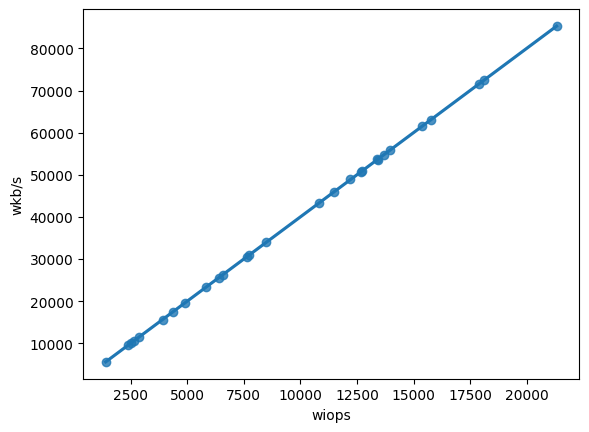

In [11]:
sns.regplot(data=df, x="wiops", y="wkb/s");

<Axes: xlabel='numjobs', ylabel='chans'>

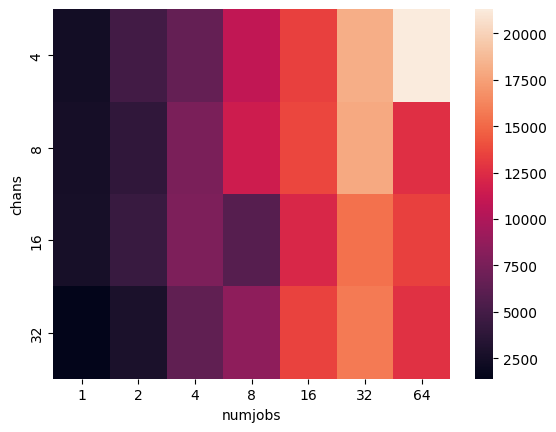

In [12]:
sns.heatmap(df.pivot(index="chans", columns="numjobs", values="riops"))

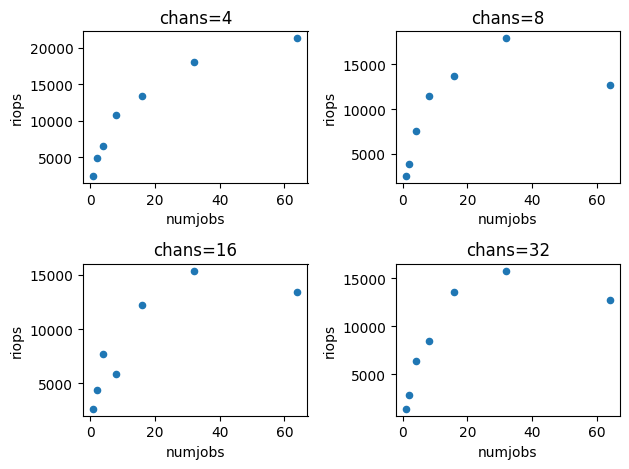

In [27]:
fig, axes = plt.subplots(2, 2)
for i, chans in enumerate([4, 8, 16, 32]):
    df[df["chans"] == chans].plot(ax=axes[i//2, i%2], x="numjobs", y="riops", kind="scatter", title=f'chans={chans}')
plt.tight_layout()
plt.show();

# This is the stuff we did w/ Teona in lab 4/11

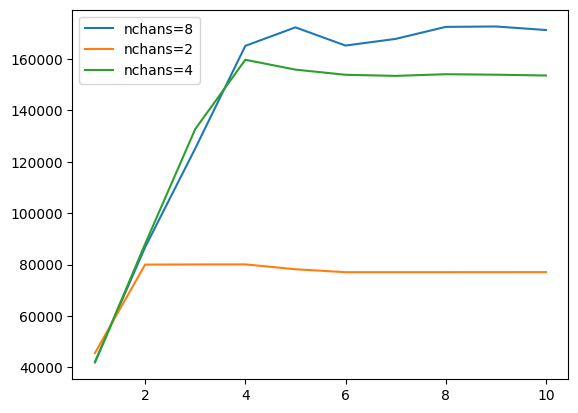

In [37]:
# [285, 307, 307, 326, 322]
# [43065, 89606, 133148, 173500, 169783]
data = [42172, 86754, 125171, 165122, 172329, 165239, 167835, 172510, 172669, 171293]
data2 = [45604, 79994, 80050, 80070, 78182, 77034, 77027, 77036, 77046, 77060]
data3 = [41895, 88034, 132722, 159716, 155874, 153869, 153439, 154088, 153905, 153587]
x = range(1, 11)
plt.plot(x, data, label='nchans=8')
plt.plot(x, data2, label='nchans=2')
plt.plot(x, data3, label='nchans=4')
plt.legend()

## ACE Data (v2)

In [6]:
# ./buffermanager -b 20 -x 100000 -k 8 -a 5
raw_data = [
    {"Policy": "LRU", "c": 2, "a": 1, "Exec Time": 41173.9, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 1, "Exec Time": 40311.5, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 2, "Exec Time": 24851, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 4, "Exec Time": 22730.4, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 8, "Exec Time": 26853.8, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 16, "Exec Time": 26043.4, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 32, "Exec Time": 25083.2, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 64, "Exec Time": 30510.4, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 4, "a": 1, "Exec Time": 34982.5, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 1, "Exec Time": 31789.8, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 2, "Exec Time": 23309.2, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 4, "Exec Time": 19842.1, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 8, "Exec Time": 26416.6, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 16, "Exec Time": 24660.1, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 32, "Exec Time": 24554.9, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 64, "Exec Time": 25482.9, "Read IOs": 50187, "Write IOs": 5547},
    
    {"Policy": "LRU", "c": 8, "a": 1, "Exec Time": 11200.5, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 1, "Exec Time": 10561.5, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 2, "Exec Time": 9346.63, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 4, "Exec Time": 9051.65, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 8, "Exec Time": 10434.3, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 16, "Exec Time": 9764.32, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 32, "Exec Time": 10886.7, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 64, "Exec Time": 11231.5, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 16, "a": 1, "Exec Time": 11391, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 1, "Exec Time": 10701.7, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 2, "Exec Time": 11206.3, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 4, "Exec Time": 10222.2, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 8, "Exec Time": 11287.1, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 16, "Exec Time": 11299.2, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 32, "Exec Time": 12327.9, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 64, "Exec Time": 11870.3, "Read IOs": 50187, "Write IOs": 5547},
    
    {"Policy": "LRU", "c": 32, "a": 1, "Exec Time": 10342.2, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 1, "Exec Time": 9525.19, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 2, "Exec Time": 7407.56, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 4, "Exec Time": 6664.12, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 8, "Exec Time": 8494.3, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 16, "Exec Time": 8931.62, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 32, "Exec Time": 9225.7, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 64, "Exec Time": 9083.95, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 64, "a": 1, "Exec Time": 9675.03, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 1, "Exec Time": 10698.4, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 2, "Exec Time": 7857.72, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 4, "Exec Time": 6707.58, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 8, "Exec Time": 8277.79, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 16, "Exec Time": 7924.06, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 32, "Exec Time": 8936.91, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 64, "Exec Time": 8300.24, "Read IOs": 50187, "Write IOs": 5547},
    
    {"Policy": "CFLRU", "c": 2, "a": 1, 
     "Read Time": 15799.3, "Write Time": 16980.5, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 1, 
     "Read Time": 16066.6, "Write Time": 12210.4, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 2, 
     "Read Time": 16924.7, "Write Time": 4749.12, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 4, 
     "Read Time": 17648.6, "Write Time": 2058.1, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 8, 
     "Read Time": 19456, "Write Time": 12794.1, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 16, 
     "Read Time": 20621.5, "Write Time": 15749.3, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 32, 
     "Read Time": 20660.3, "Write Time": 14965.7, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 64, 
     "Read Time": 19222.7, "Write Time": 12982.2, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 4, "a": 1, 
     "Read Time": 16108.8, "Write Time": 15987.7, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 1, 
     "Read Time": 16347.6, "Write Time": 13326, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 2, 
     "Read Time": 17269.7, "Write Time": 5635.21, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 4, 
     "Read Time": 17977.9, "Write Time": 561.262, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 8, 
     "Read Time": 18561, "Write Time": 7976.51, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 16, 
     "Read Time": 18444.2, "Write Time": 8753, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 32, 
     "Read Time": 18459.6, "Write Time": 8995.33, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 64,
     "Read Time": 18459.2, "Write Time": 9142.2, "Read IOs": 50196, "Write IOs": 3253},
    
    {"Policy": "CFLRU", "c": 8, "a": 1, "Exec Time": 11459.5, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 1, "Exec Time": 11601.4, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 2, "Exec Time": 10206.1, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 4, "Exec Time": 10759.2, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 8, "Exec Time": 11962.1, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 16, "Exec Time": 11979, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 32, "Exec Time": 12291.3, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 64, "Exec Time": 11828.9, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 16, "a": 1, "Exec Time": 11204, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 1, "Exec Time": 11023.2, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 2, "Exec Time": 9760.23, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 4, "Exec Time": 10356.6, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 8, "Exec Time": 12270.4, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 16, "Exec Time": 11101.4, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 32, "Exec Time": 11521.5, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 64, "Exec Time": 12492.9, "Read IOs": 50196, "Write IOs": 3253},
    
    {"Policy": "CFLRU", "c": 32, "a": 1, "Exec Time": 8540.17, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 1, "Exec Time": 8321.68, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 2, "Exec Time": 6476.11, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 4, "Exec Time": 6117.87, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 8, "Exec Time": 9483.5, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 16, "Exec Time": 8930.19, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 32, "Exec Time": 8993.18, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 64, "Exec Time": 9463.29, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 64, "a": 1, "Exec Time": 10558.6, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 1, "Exec Time": 9055.63, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 2, "Exec Time": 7104.2, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 4, "Exec Time": 6834.86, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 8, "Exec Time": 9203.12, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 16, "Exec Time": 8993.6, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 32, "Exec Time": 9105.89, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 64, "Exec Time": 9288.41, "Read IOs": 50196, "Write IOs": 3253},
    
    {"Policy": "LRU-WSR", "c": 2, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 4, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    
    {"Policy": "LRU-WSR", "c": 8, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 16, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    
    {"Policy": "LRU-WSR", "c": 32, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 64, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
]

In [10]:
df = pd.DataFrame(raw_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Policy      144 non-null    object 
 1   c           144 non-null    int64  
 2   a           144 non-null    int64  
 3   Exec Time   80 non-null     float64
 4   Read IOs    144 non-null    int64  
 5   Write IOs   144 non-null    int64  
 6   k           126 non-null    float64
 7   Read Time   16 non-null     float64
 8   Write Time  16 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 10.2+ KB


In [11]:
# preproc
df["Exec Time"].fillna(df["Read Time"]+df["Write Time"], inplace=True)
del df["Read Time"]
del df["Write Time"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Policy     144 non-null    object 
 1   c          144 non-null    int64  
 2   a          144 non-null    int64  
 3   Exec Time  96 non-null     float64
 4   Read IOs   144 non-null    int64  
 5   Write IOs  144 non-null    int64  
 6   k          126 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 8.0+ KB


<Axes: xlabel='k', ylabel='Exec Time'>

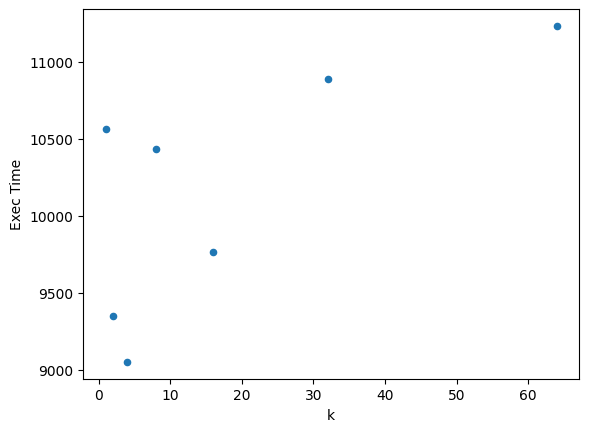

In [24]:
df_lru = df[df["Policy"] == "LRU"]
df_lru[df_lru["c"] == 8].plot(x="k", y="Exec Time", kind="scatter")

<Axes: xlabel='k', ylabel='c'>

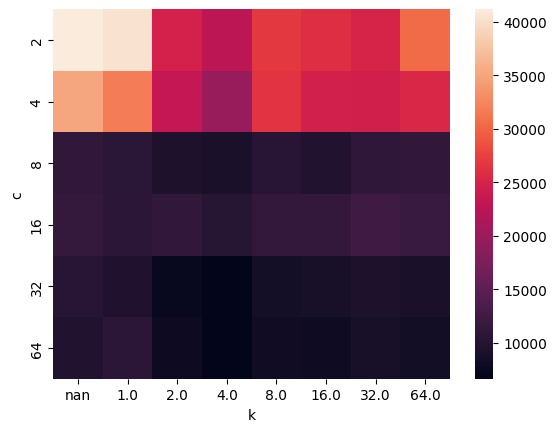

In [29]:
sns.heatmap(df_lru.pivot(index="c", columns="k", values="Exec Time"))

## below is all old

In [4]:
raw_data = {
    "LRU": [
        [0.28171, 0.36874, 0.262841, 0.293447, 0.325124, 0.272456],
        [0.275579, 0.30572, 0.273791, 0.279003, 0.314242, 0.286744],
        [0.275572, 0.263423, 0.283012, 0.271025, 0.944937, 0.28326],
        [0.493662, 1.36281, 1.58489, 0.455622, 1.68356, 0.474939],
        [0.415115, 1.06555, 0.440796, 0.407074, 0.428242, 0.44811]
    ],
    "CFLRU": [
        [0.287094, 0.290443, 0.285219, 0.303059, 0.333291, 0.266269],
        [0.288069, 0.297067, 0.291356, 0.29504, 0.29758, 0.315849],
        [0.927584, 0.976015, 0.944146, 0.26992, 0.265757, 0.278178],
        [1.56978, 1.53937, 1.53116, 0.503947, 1.65934, 0.498925],
        [0.411775, 1.28503, 0.40969, 0.427626, 0.425763, 1.43597]
    ],
    "LRU-WSR": [
        [0.317221, 0.279914, 0.276451, 0.281423, 0.324301, 0.364748],
        [0.285101, 0.289854, 0.29664, 0.2792, 0.278329, 0.320304],
        [0.28108, 1.29242, 0.991301, 1.43693, 0.447472, 1.43452],
        [1.59057, 1.55234, 1.58517, 0.477171, 1.66597, 0.495076],
        [0.415186, 1.26919, 0.418681, 0.431878, 0.421693, 0.416233]
    ]
}

In [5]:
# k=row, c=col
df = pd.DataFrame(raw_data["LRU-WSR"], columns=[2,4,8,16,32,64], index=[2,4,8,16,32])
df.head()

,2,4,8,16,32,64
2,0.317221,0.279914,0.276451,0.281423,0.324301,0.364748
4,0.285101,0.289854,0.296640,0.279200,0.278329,0.320304
8,0.281080,1.292420,0.991301,1.436930,0.447472,1.434520
16,1.590570,1.552340,1.585170,0.477171,1.665970,0.495076
32,0.415186,1.269190,0.418681,0.431878,0.421693,0.416233


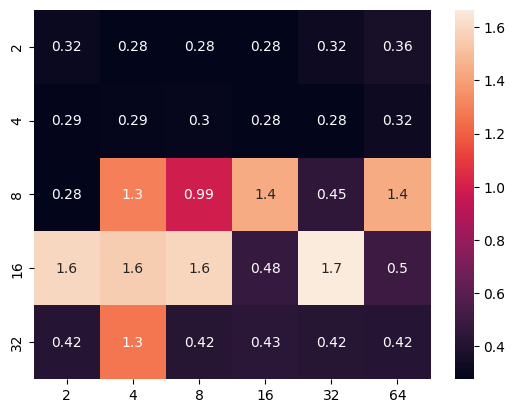

In [6]:
sns.heatmap(df, annot=True);
# run bigger experiments
# get a baseline (k=1)
# tommy: test a=5

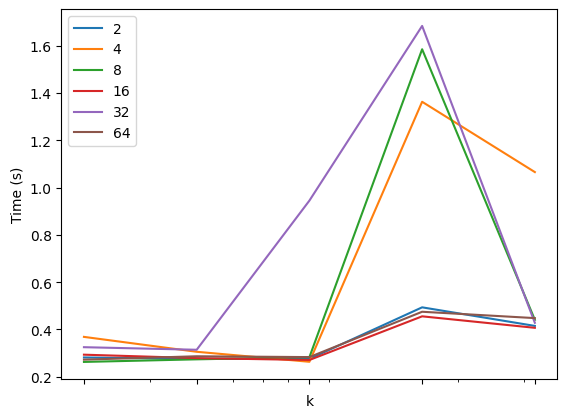

In [29]:
df.plot(logx=True, xticks=[2,4,8,16,32], xlabel="k", ylabel="Time (s)");

Tommy's Experiment on Varying Bufferpool Size


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


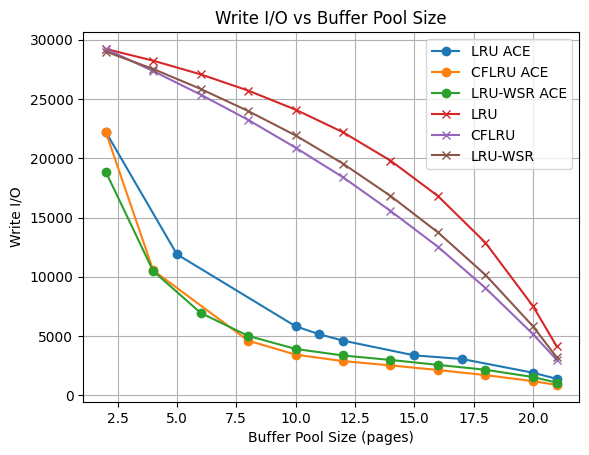

In [10]:
%pip install matplotlib
import matplotlib.pyplot as plt
#-x = 5000 -r = 1 -w  = 8 -k = 8 -a = 5 everything else 50-50 ratio
bufferpool_pages = [2,4,6,8,10,12,14,16,18,20,21]
bufferpool_pagesLRU = [2,5,10,11,12,15,17,20,21]
bufferpool_pagesCFLRU = [2,4,8,10,12,14,16,18,20,21]

bufferpool_pagesLRU_WSR_noace=[2,4,6,8,10,12,14,16,18,20,21]

#Write IO data hits 0 whenever the b value >= n value
Write_IO_data = {
    "LRU":[22238,11896,5821,5145,4610,3364,3063,1901,1386],
    "CFLRU":[22238,10541,4609,3427,2878,2517,2126,1700,1190,869],
    "LRU-WSR":[18880,10482,6946,5011,3906,3353,2978,2560,2150,1537,1067]
}
Write_IO_data2 = {
    "LRU":[29229,28237,27084,25716,24105,22196,19803,16812,12878,7529,4137],
    "CFLRU":[29229,27356,25375,23245,20894,18395,15556,12527,9054,5163,2995],
    "LRU-WSR":[29007,27540,25853,23992,21928,19546,16823,13743,10163,5826,3207]
}

#-x = 100000
"""
Write_IO_data = {
    "LRU":[14328,8235,4231,2207,0,0],
    "CFLRU":[631,266,196,117,0,0],
    "LRU-WSR":[534,262,176,0,0,0]
}
"""

plt.plot(bufferpool_pagesLRU, Write_IO_data["LRU"], marker='o', label="LRU ACE")
plt.plot(bufferpool_pagesCFLRU, Write_IO_data["CFLRU"], marker='o', label="CFLRU ACE")
plt.plot(bufferpool_pages, Write_IO_data["LRU-WSR"], marker='o', label="LRU-WSR ACE")
plt.plot(bufferpool_pagesLRU_WSR_noace, Write_IO_data2["LRU"], marker='x', label="LRU")
plt.plot(bufferpool_pages, Write_IO_data2["CFLRU"], marker='x', label="CFLRU")
plt.plot(bufferpool_pagesLRU_WSR_noace, Write_IO_data2["LRU-WSR"], marker='x', label="LRU-WSR")

# Add chart labels and title
plt.xlabel("Buffer Pool Size (pages)")
plt.ylabel("Write I/O")
plt.title("Write I/O vs Buffer Pool Size")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


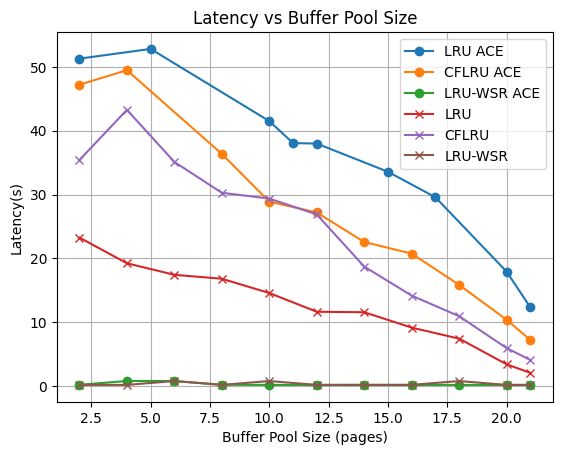

In [14]:
%pip install matplotlib
import matplotlib.pyplot as plt
#-x = 100000 -k = 8 -a = 5 everything else default
bufferpool_pages = [2,4,6,8,10,12,14,16,18,20,21]
bufferpool_pagesLRU = [2,5,10,11,12,15,17,20,21]
bufferpool_pagesCFLRU = [2,4,8,10,12,14,16,18,20,21]

bufferpool_pagesLRU_WSR_noace=[2,4,6,8,10,12,14,16,18,20,21]

#Write IO data hits 0 whenever the b value >= n value
Latencydata = {
    "LRU":[51.2935,52.8182,41.5072,38.0656,37.9895,33.5717,29.5738,17.9255,12.3174],
    "CFLRU":[47.2154,49.4872,36.3638,28.8938,27.1976,22.5636,20.7529,15.8497,10.3842,7.22149],
    "LRU-WSR":[0.20001,.788917,.788086,.205583,.180346,.180172,.18213,.1797,.180284,.18065,.17981]
}
Latencydata2 = {
    "LRU":[23.2583,19.2375,17.428,16.8116,14.5746,11.6412,11.5625,9.15745,7.42757,3.4045,2.06332],
    "CFLRU":[35.4191,43.2718,35.1142,30.2772,29.374,26.8823,18.7201,14.1675,10.9427,5.95002,4.08536],
    "LRU-WSR":[.179821,.179186,.78665,.180629,.787804,.179928,.182235,.180793,.7868,.17782,.177566]
}



plt.plot(bufferpool_pagesLRU, Latencydata["LRU"], marker='o', label="LRU ACE")
plt.plot(bufferpool_pagesCFLRU, Latencydata["CFLRU"], marker='o', label="CFLRU ACE")
plt.plot(bufferpool_pages, Latencydata["LRU-WSR"], marker='o', label="LRU-WSR ACE")
#plt.plot(bufferpool_pagesLRU_WSR_noace, Latencydata2["LRU"], marker='x', label="LRU")
#plt.plot(bufferpool_pages, Latencydata2["CFLRU"], marker='x', label="CFLRU")
#plt.plot(bufferpool_pagesLRU_WSR_noace, Latencydata2["LRU-WSR"], marker='x', label="LRU-WSR")

# Add chart labels and title
plt.xlabel("Buffer Pool Size (pages)")
plt.ylabel("Latency(s)")
plt.title("Latency vs Buffer Pool Size")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## SSD Concurrency vs. Latency (num_of_channels=[2,4,8,16] in FEMU) ##

In [ ]:
# example prompt: ./buffermanager -b 15 -x 100000 -k 8 -a 5

"""
Policy: LRU/CFLRU/LRU-WSR
c: Number of channels in FEMU
a: 1 (ACE is off) / 5 (ACE is on)
k: ACE concurrency
Exec Time: Total execution time of workload
Read IOs: Number of Read I/Os
Write IOs: Number of Write I/Os
"""
raw_data = [
    {"Policy": "LRU", "c": 2, "a": 1, "Exec Time": 8615.4, "Read IOs": 25099, "Write IOs": 15827},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 1, "Exec Time": 10276.2, "Read IOs": 25099, "Write IOs": 15827},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 2, "Exec Time": 13482.4, "Read IOs": 25099, "Write IOs": 8562},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 4, "Exec Time": 16415.8, "Read IOs": 25099, "Write IOs": 4860},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 8, "Exec Time": 15285.4, "Read IOs": 25099, "Write IOs": 3047},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 16, "Exec Time": 14331.6, "Read IOs": 25099, "Write IOs": 2796},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 32, "Exec Time": 14385.9, "Read IOs": 25099, "Write IOs": 2796},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 64, "Exec Time": 14013.5, "Read IOs": 25099, "Write IOs": 2796},

    {"Policy": "LRU", "c": 4, "a": 1, "Exec Time": 7379.7, "Read IOs": 25099, "Write IOs": 15827},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 1, "Exec Time": 7878.7, "Read IOs": 25099, "Write IOs": 15827},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 2, "Exec Time": 10838, "Read IOs": 25099, "Write IOs": 8562},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 4, "Exec Time": 11179.6, "Read IOs": 25099, "Write IOs": 4860},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 8, "Exec Time": 12883.5, "Read IOs": 25099, "Write IOs": 3047},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 16, "Exec Time": 12207.2, "Read IOs": 25099, "Write IOs": 2796},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 32, "Exec Time": 12014.4, "Read IOs": 25099, "Write IOs": 2796},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 64, "Exec Time": 11842.7, "Read IOs": 25099, "Write IOs": 2796},

    {"Policy": "LRU", "c": 8, "a": 1, "Exec Time": 7169.9, "Read IOs": 25099, "Write IOs": 15827},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 1, "Exec Time": 7668.3, "Read IOs": 25099, "Write IOs": 15827},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 2, "Exec Time": 9987.7, "Read IOs": 25099, "Write IOs": 12076},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 4, "Exec Time": 10359.3, "Read IOs": 25099, "Write IOs": 8562},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 8, "Exec Time": 11375.5, "Read IOs": 25099, "Write IOs": 4860},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 16, "Exec Time": 11578.3, "Read IOs": 25099, "Write IOs": 2796},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 32, "Exec Time": 11436.5, "Read IOs": 25099, "Write IOs": 2796},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 64, "Exec Time": 11540.2, "Read IOs": 25099, "Write IOs": 2796},

    {"Policy": "LRU", "c": 16, "a": 1, "Exec Time": 7009.45, "Read IOs": 25099, "Write IOs": 15827},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 1, "Exec Time": 7258.91, "Read IOs": 25099, "Write IOs": 15827},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 2, "Exec Time": 8688.1, "Read IOs": 25099, "Write IOs": 12076},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 4, "Exec Time": 9847.6, "Read IOs": 25099, "Write IOs": 8562},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 8, "Exec Time": 11001.3, "Read IOs": 25099, "Write IOs": 4860},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 16, "Exec Time": 10965.3, "Read IOs": 25099, "Write IOs": 2796},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 32, "Exec Time": 10857.8, "Read IOs": 25099, "Write IOs": 2796},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 64, "Exec Time": 10921.5, "Read IOs": 25099, "Write IOs": 2796},


    {"Policy": "CFLRU", "c": 2, "a": 1, "Exec Time": 7924.18, "Read IOs": 25224, "Write IOs": 11954},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 1, "Exec Time": 8819.22, "Read IOs": 25224, "Write IOs": 11954},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 2, "Exec Time": 10277.8, "Read IOs": 25107, "Write IOs": 6413},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 4, "Exec Time": 10329.4, "Read IOs": 25070, "Write IOs": 3604},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 8, "Exec Time": 9443.28, "Read IOs": 25153, "Write IOs": 2127},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 16, "Exec Time": 9199.42, "Read IOs": 25085, "Write IOs": 1597},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 32, "Exec Time": 9603.58, "Read IOs": 25085, "Write IOs": 1597},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 64, "Exec Time": 9225.45, "Read IOs": 25085, "Write IOs": 1597},

    {"Policy": "CFLRU", "c": 4, "a": 1, "Exec Time": 6100.25, "Read IOs": 25224, "Write IOs": 11954},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 1, "Exec Time": 7583.74, "Read IOs": 25224, "Write IOs": 11954},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 2, "Exec Time": 9633.6, "Read IOs": 25107, "Write IOs": 6413},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 4, "Exec Time": 93558, "Read IOs": 25070, "Write IOs": 3604},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 8, "Exec Time": 9235.9, "Read IOs": 25153, "Write IOs": 2127},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 16, "Exec Time": 10305.1, "Read IOs": 25085, "Write IOs": 1597},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 32, "Exec Time": 10025.2, "Read IOs": 25085, "Write IOs": 1597},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 64, "Exec Time": 10105, "Read IOs": 25085, "Write IOs": 1597},

    {"Policy": "CFLRU", "c": 8, "a": 1, "Exec Time": 6171.54, "Read IOs": 25224, "Write IOs": 11954},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 1, "Exec Time": 6769.69, "Read IOs": 25224, "Write IOs": 11954},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 2, "Exec Time": 8130.37, "Read IOs": 25107, "Write IOs": 6413},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 4, "Exec Time": 9292.06, "Read IOs": 25070, "Write IOs": 3604},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 8, "Exec Time": 9789.66, "Read IOs": 25153, "Write IOs": 2127},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 16, "Exec Time": 9817.82, "Read IOs": 25085, "Write IOs": 1597},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 32, "Exec Time": 9476.15, "Read IOs": 25085, "Write IOs": 1597},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 64, "Exec Time": 9888.16, "Read IOs": 25085, "Write IOs": 1597},

    {"Policy": "CFLRU", "c": 16, "a": 1, "Exec Time": 6207.91, "Read IOs": 25224, "Write IOs": 11954},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 1, "Exec Time": 6756.8, "Read IOs": 25224, "Write IOs": 11954},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 2, "Exec Time": 7671.2, "Read IOs": 25107, "Write IOs": 6413},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 4, "Exec Time": 9085.94, "Read IOs": 25070, "Write IOs": 3604},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 8, "Exec Time": 9586.4, "Read IOs": 25153, "Write IOs": 2127},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 16, "Exec Time": 9748.62, "Read IOs": 25085, "Write IOs": 1597},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 32, "Exec Time": 9848.8, "Read IOs": 25085, "Write IOs": 1597},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 64, "Exec Time": 9643.6, "Read IOs": 25085, "Write IOs": 1597},


    {"Policy": "LRU-WSR", "c": 2, "a": 1, "Read IOs": 25096, "Write IOs": 12802},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 1, "Read IOs": 25096, "Write IOs": 12802},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 2, "Read IOs": 25193, "Write IOs": 7180},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 4, "Read IOs": 25121, "Write IOs": 4215},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 8, "Read IOs": 25090, "Write IOs": 2498},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 16, "Read IOs": 25184, "Write IOs": 1736},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 32, "Read IOs": 25184, "Write IOs": 1736},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 64, "Read IOs": 25184, "Write IOs": 1736}
]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.DataFrame(raw_data)

filtered_df = df[(df['c'] == 2) & (df['a'] == 5)]

lru_data = filtered_df[filtered_df['Policy'] == 'LRU']
cf_lru_data = filtered_df[filtered_df['Policy'] == 'CFLRU']
lru_wsr_data = filtered_df[filtered_df['Policy'] == 'LRU-WSR']

plt.figure(figsize=(10, 6))

plt.plot(lru_data["k"], lru_data["Write IOs"], marker='o', label="ACE-LRU")
plt.plot(cf_lru_data["k"], cf_lru_data["Write IOs"], marker='o', label="ACE-CFLRU")
plt.plot(lru_wsr_data["k"], lru_wsr_data["Write IOs"], marker='o', label="ACE-LRU-WSR")

plt.xscale('log', base=2) 

xticks = lru_data["k"].unique()  
plt.xticks(xticks, xticks.astype(int).astype(str)) 

plt.xlabel("Concurrency in ACE")
plt.ylabel("Write I/O Batches")
plt.title("Write I/O Batches vs. Concurrency in ACE for Different Policies")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

lru_data = pd.DataFrame(raw_data)
lru_data = lru_data[lru_data['Policy'] == 'LRU']
heatmap_data = lru_data.pivot(index='c', columns='k', values='Exec Time')

lru_data['k'] = pd.to_numeric(lru_data['k'], errors='coerce').astype('Int64')
heatmap_data = lru_data.pivot(index='c', columns='k', values='Exec Time')


heatmap_data = heatmap_data.drop(columns=[float('nan')], errors='ignore')  # Drop default

heatmap_data = heatmap_data / 1000

plt.figure(figsize=(8, 6))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis_r")
ax.set_xlabel("Concurrency in ACE")  # Set x-axis label
ax.set_ylabel("Number of Channels in SSD")  # Set y-axis label
plt.title("Execution Times (s) of Running ACE-LRU")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'raw_data' is your list of dictionaries

df = pd.DataFrame(raw_data)

# Filter the data for the desired conditions
lru_a1_data = df[(df['Policy'] == 'LRU') & (df['a'] == 1)]
lru_a5_k1_data = df[(df['Policy'] == 'LRU') & (df['a'] == 5) & (df['k'] == 1)]
cflru_a1_data = df[(df['Policy'] == 'CFLRU') & (df['a'] == 1)]
cflru_a5_k1_data = df[(df['Policy'] == 'CFLRU') & (df['a'] == 5) & (df['k'] == 1)]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot with specified colors and symbols
plt.plot(lru_a1_data['c'], lru_a1_data['Exec Time'] / 1000, marker='.', color='red', linestyle='-', label="LRU", markersize=10)
plt.plot(lru_a5_k1_data['c'], lru_a5_k1_data['Exec Time'] / 1000, marker='x', color='red', linestyle='-', label="ACE-LRU but k=1", markersize=10)
plt.plot(cflru_a1_data['c'], cflru_a1_data['Exec Time'] / 1000, marker='.', color='blue', linestyle='-', label="CFLRU", markersize=10)
plt.plot(cflru_a5_k1_data['c'], cflru_a5_k1_data['Exec Time'] / 1000, marker='x', color='blue', linestyle='-', label="ACE-CFLRU but k=1", markersize=10)

plt.xscale('log', base=2)  # Set x-axis to log2 scale

plt.xticks([2, 4, 8, 16], ['2', '4', '8', '16'])


plt.xlabel("Number of Channels in SSD")
plt.ylabel("Execution Times (s)")
plt.title("Execution Times (s) vs. Number of Channels in SSD for ACE On/Off (k=1)")
plt.legend()
plt.grid(True)

plt.show()